In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [5]:
df = pd.read_csv("clean_co2.csv")


In [6]:
print(df.head())

   year  month  date     CO2
0  1974      5    19  333.46
1  1974      5    20  333.64
2  1974      5    21  333.50
3  1974      5    22  333.21
4  1974      5    23  333.05


In [9]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
else:
    df.index = pd.RangeIndex(start=0, stop=len(df), step=1)


Available columns: ['year', 'month', 'CO2']


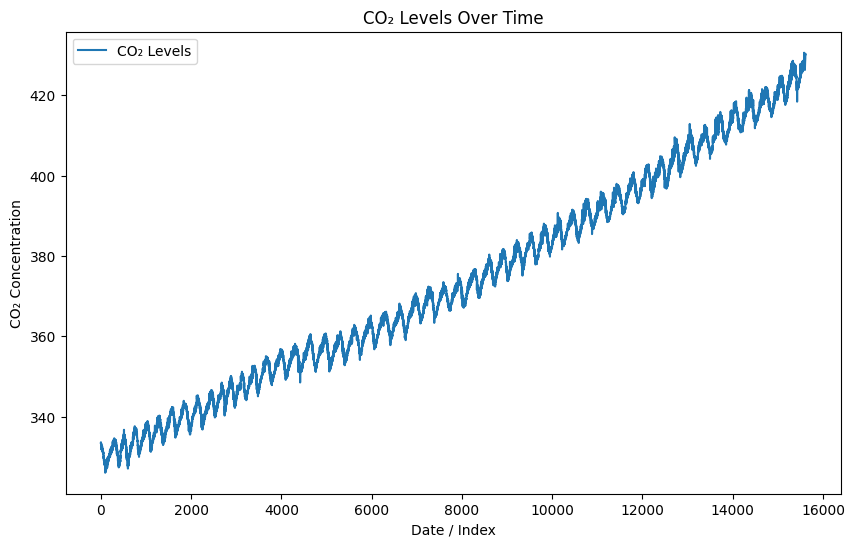

In [11]:
print("Available columns:", df.columns.tolist())

possible_cols = ["co2", "CO2", "value", "average", "Interpolated", "trend"]
col_to_use = None

for col in possible_cols:
    if col in df.columns:
        col_to_use = col
        break

if col_to_use is None:
    raise ValueError("Could not find a CO₂ column in the dataset. Please check df.columns output.")

# Plot data 
plt.figure(figsize=(10,6))
plt.plot(df.index, df[col_to_use], label="CO₂ Levels")
plt.title("CO₂ Levels Over Time")
plt.xlabel("Date / Index")
plt.ylabel("CO₂ Concentration")
plt.legend()
plt.show()


In [13]:
# train-test split
train_size = int(len(df) * 0.8)
train, test = df[col_to_use][:train_size], df[col_to_use][train_size:]

In [14]:
# ARIMA model
model = ARIMA(train, order=(5,1,0))  # (p,d,q) parameters, can tune later
model_fit = model.fit()

In [15]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

In [16]:
# Evaluate
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

MAE: 13.450
RMSE: 15.267


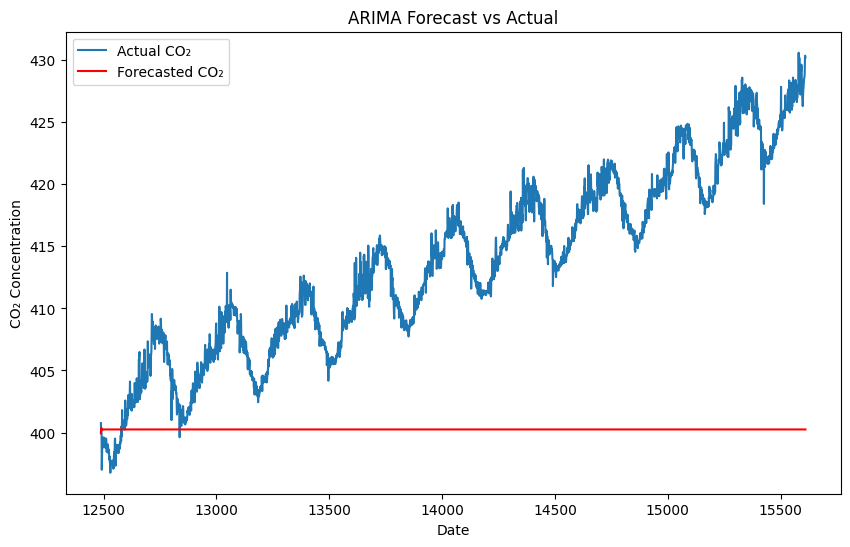

In [17]:
# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label="Actual CO₂")
plt.plot(test.index, forecast, label="Forecasted CO₂", color="red")
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("CO₂ Concentration")
plt.legend()
plt.show()

## Next Steps
- Extend dataset to include **temperature, humidity, precipitation, and other gases**.
- Move from ARIMA (single-variable) to **multivariate models** like Random Forest, LSTM, or Transformers.
- Identify **which sectors (transport, industry, household, etc.) contribute the most** to emissions.
- Develop a real-time **dashboard** for policymakers and public awareness.
